## COMP5721M: Programming for Data Science 

## Coursework 3: Data Analysis Project

Last modified: 26 November 2023


# Factor Affecting Trending Youtube Videos!


_Give names and emails of group members here:_

* Shubham Dubey, sc23sd@leeds.ac.uk
* _NameB_, _usernameB_@leeds.ac.uk
* _NameC_, _usernameC_@leeds.ac.uk
* _NameD_, _usernameD_@leeds.ac.uk

# Project Requirements
_PLEASE DELETE THIS WHOLE CELL BEFORE SUBMITTING YOUR PROJECT_

The purpose of this assignment is to develop your skills
in organising and presenting a Data Science project.

Since most of the marks will be awarded for organisation
and presentation, it is suggested that you do not initially attempt
anything too complicated. However, once you have managed
to get a basic pipeline working that fits the guidelines, 
you are encouraged to extend and elaborate your analysis.

Your project should entirely be contained within this template file.
You should keep the basic structure indicated below. To facilitate
grading according to the marking scheme.

You _may_ import any module that is provided with Anaconda3 Python.


### Marking Scheme

The marking scheme  is as follows:

* Project Plan:
    * Description of data to be used (10)
    * Overview of Project Aims  (5)
    * Design  (5)
    
* Program Code: (15)<br>
    Code should be laid out in steps with explanations
    and intermediate output with comments. 
    You should ensure that the steps do not require
    a large amount of processing time.

* Project Outcome:
    * Explanation of Results (10)<br>
        This should include a qualitative description
        of the results as well as key figures and tables
        of results.
    * Results visualisation (10)<br>
        This should be graphical representations of the
        results with brief explanations (ordinary tables will be
        graded as part of the explanation of results)
    * Conclusion (5)

### Data Resources

You can use any data you like. Many useful resources are available.

The Data Resources section of the module (Unit 4.3 on Minerva) has links to several example data sets.

As a starting point you could browse the following:
* [Kaggle](https://www.kaggle.com/)
* [Our World in Data](https://ourworldindata.org/)
* [scikit-learn datasets](https://scikit-learn.org/stable/datasets.html)
* [scikit-learn tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)




### Using this Notebook Template
Please use this notebook as a template for your project file.
In the following cells of the notebook, _italic text_ giving explanations
and examples should be either deleted, or, in most cases, replaced by appropriate text describing your project. 
Text that is not in italic (which is mostly headings) should
be left as it is. __Your project report notebook should the same overall
structure as this template notebook.__
An exception to this is the current markup cell describing the project
requiements. You should delete this before submitting your notebook.

# Project Plan

## The Data (10 marks)

_Here you should describe the data indluding details of:
where it comes from, what data it contains, is it accurate. (Potentially you could create data from a simulation but you should still explain why and how you intend to generate this data.)_

_It can be just one dataset or several that can be combined
somehow._

_There are 10 marks for this, so a fairly detailed description
of the data is expected (around 300-400 words)_



## Project Aim and Objectives (5 marks)

_Here you should describe the general aim of your project in
around 200-300 words._

_This can can be anything from classifying items according to
their characteristic features (which mushrooms are poisonous?) 
to simulating an evolving process (will the rabbits eat all
the carrots or get eaten by the foxes?)_

_Here some ideas of general types of processing functionality
that you could implement:_

* _Classification: separate data items into classes according
  to their charactersitics (can be either a definite or a
  statistical kind of classification)_
* _Corellation: find correspondences between different attributes within
  a dataset_
* _Search: find solutions matching some criteria_
* _Visualisation: find informative ways to
  display the structure of a large and/or complex dataset_
* _Query Answering: create a system that enables one to retrieve information by evaluating some form of query representation_
* _Simulation: model the evolution of a complex process_

### Specific Objective(s)

_You should chose and list __up to 4__ specific objectives suited to the data you will be working with and the type of project you wish to carry out. 
There should be <b>at least one
per person doing the project</b>. There is no need
for  the objectives them to be completely different. 
They could be different
stages of the processing requirements, or different processing
functions that the system  provides. Or just
different aspects of data analysis that will be conducted.
Typically, it is expected that there would be one objective
per person. Replace the following examples with your own objectives:_

* __Objective 1:__ _create a Python datastructure that will ensure world peace_
* __Objective 2:__ _stop global warming using a pandas dataframe_
* __Objective 3:__ _end poverty using matplotlib_
* __Objective 4:__ _end suffering with sklearn_

## System Design (5 marks)

_Describe your code in terms of the
following two sections._

### Architecture

_Typically this would be  a pipeline in which data goes through several
stages of transformation and analysis, but other architectures are possible.
This does not need to be particularly complicated. A simple diagram with
100-150 words of explanation would
be a good way to present your architecture._
  
### Processing Modules and Algorithms

_Briefly list and describe the most significant computational components of your system and the algorithms you will use to implement them. 
This could include things like:_

* _cleaning the data by removing outliers_
* _combining different datasets_
* _converting samples to a special representaion (such as feature vectors)_
* _constructing a special data-structure (such as a decision tree)_
* _running some kind of analysis_

_Your list can be presented in similar form to the one just given, 
but should include a brief
but more specific description of the components and/or algorithms.
Probably three or four components is sufficient for most projects, but
you may want to have more._

## System Design (5 marks)

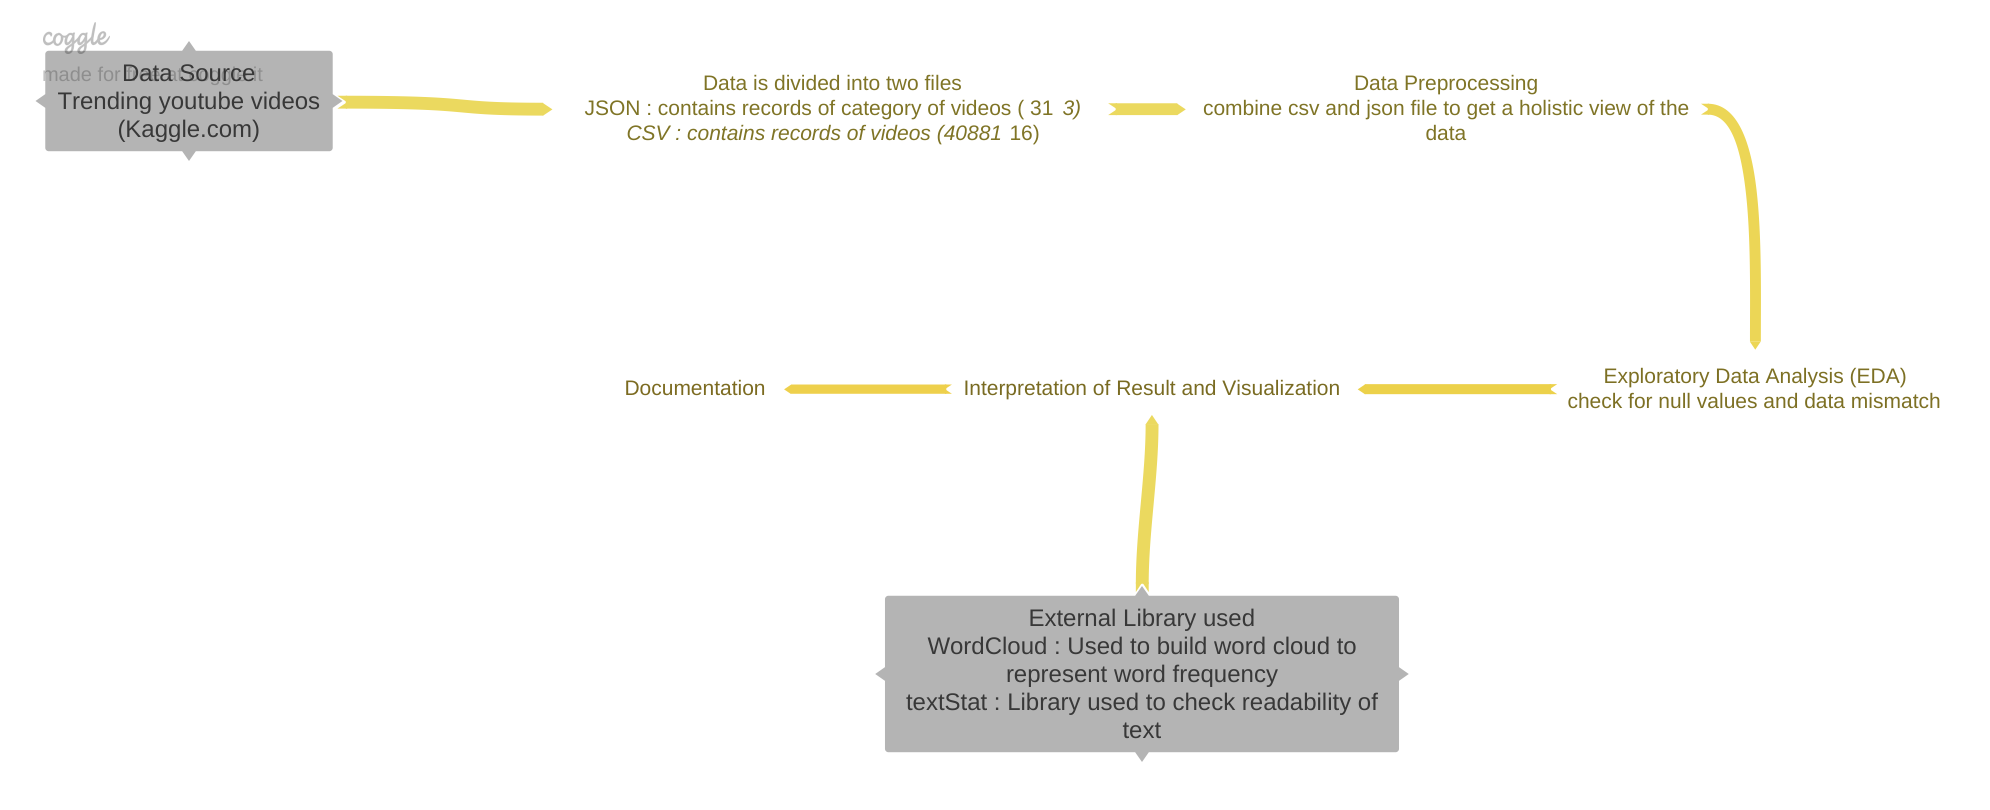

### Importing required modules

In [3]:
!pip install session-info
!pip install wordcloud
!pip install textstat
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from wordcloud import WordCloud
from datetime import datetime
import warnings
import re
import textstat
warnings.simplefilter(action='ignore')

### Importing video dataset (C.S.V)

In [5]:
videoDF = pd.read_csv("../archive/CAvideos.csv")
videoDF.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


### Importing category dataset (JSON)

In [7]:
categoryDf = pd.read_json("../archive/CA_category_id.json")
categoryDf.head(5)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
1,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
2,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
3,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
4,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."


### Exploratory Data Analysis (E.D.A)

### Video Dataset EDA

In [8]:
videoDF.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [9]:
videoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [10]:
videoDF.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


### Category Dataset EDA

In [11]:
categoryDf.columns

Index(['kind', 'etag', 'items'], dtype='object')

In [12]:
categoryDf.describe()

,kind,etag,items
count,31,31,31
unique,1,1,31
top,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
freq,31,31,1


In [13]:
categoryDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kind    31 non-null     object
 1   etag    31 non-null     object
 2   items   31 non-null     object
dtypes: object(3)
memory usage: 872.0+ bytes


In [14]:
# method to print Json Object in readable format.. 
def printJsonObject(obj):
    line_list = obj.split("\n")
    for line in line_list:
        print(line)

In [15]:
## Exploring an complete json item in category dataset
output = json.dumps(categoryDf.iloc[0]["items"],indent=1)
printJsonObject(output)

{
 "kind": "youtube#videoCategory",
 "etag": "\"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ\"",
 "id": "1",
 "snippet": {
  "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
  "title": "Film & Animation",
  "assignable": true
 }
}


# Program Code (15 marks)

_Your code should be divided into relatively short cells, with brief
explanation in markup cells between._

_As noted in the assigment overview, it is not necessary that your coding be
super complex in order to get a good mark. Although there is a mark for
the coding achievement, it is only a quarter of the total._

_The suggested length of the code is about 150 lines for 1 person or 500
for a 4 peope project. You should not use more than 500 lines of code._

_You should divide the code in accordance with the specification of modules and/or
algorithms you gave in the previous section. Complex modules should be further
divided into several code cells._

Please note the following about your code:
* <b><i>You may import any packages/modules you wish to use for your project.</i></b>


* <b><i>You should submit your notebook in a state where all cells have been
    executed and are displaying the output that you wish to present for grading.</i></b>
    (We will not normally run your code, unless for some reason we wish to check
    that the code functionality matches the given description.)
    
    
* Although you may be programming in a "pipeline" style, it is strongly suggested you use function definitions to organise your code. As well as being generally good programming practice, it will be helpful for easy and flexibily presentation of results visualisations later in the document. In the visualisation sections you will be able to produce images in a concise and flexible way by calling functions defined in the program code secion.

## Objective 1 : How does factor like tags, title and description effect trending of videos!!!!

In [16]:
## Making copy of original dataframe
videoDFCP = videoDF.copy()

In [17]:
# method to get category
def getCategoryFromJson(data):
    category = {}
    for i, row in data.iterrows():
        tempdict = dict(row)
        category[tempdict["items"]["id"]]= tempdict["items"]["snippet"]["title"]
    return category

In [18]:
# method to get combine dataFrames 
def appendCategoryToDataFrame(dataFrame,category):
    tempList = []
    for i,row in dataFrame.iterrows():
        if str(row["category_id"]) in category.keys():
            tempList.append(category[str(row["category_id"])])
        else :
            tempList.append(None)
    dataFrame["category_name"] = tempList
    return dataFrame

In [19]:
# getting complete Df after adding category to df
getCategoryJson = getCategoryFromJson(categoryDf)
videoCompleteDF = appendCategoryToDataFrame(videoDFCP,getCategoryJson)
videoCompleteDF.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


## Objective 1.1 How tags affect videos?

### Objective 1.1.1 : Does having tags in video help it to trend??

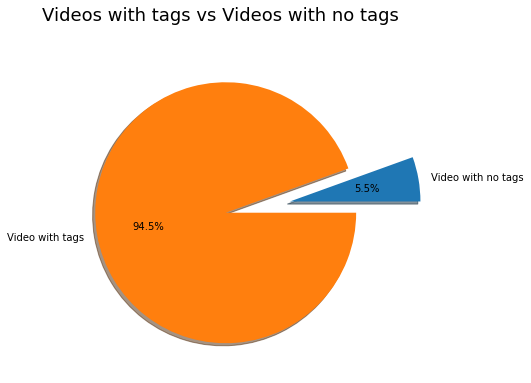

In [24]:
# pie chart representing videos with tags vs videos with no tags
def pieChartTag():
    # ratio of videos with tags V/S vidoes without tags
    pieList = [videoCompleteDF[videoCompleteDF["tags"]=="[none]"].shape[0],videoCompleteDF.shape[0]]
    lables=["Video with no tags","Video with tags"]
    fig, ax = plt.subplots(figsize=(6, 6))
    explode=(0.5,0)
    ax.pie(pieList,labels=lables,explode=explode,autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'b', 'shade': 1})
    fig.suptitle("Videos with tags vs Videos with no tags",fontsize=18)
    plt.show()
pieChartTag()

### Objective 1.1.2 : Most common tags used across trending videos!!

In [34]:
## Word Frequency of tags and sorted in decending order
tagsDictionary = {}
numberOfTagsPerVideo = []
for i,row in videoCompleteDF.iterrows():
    numberOfTagsPerVideo.append(len(row["tags"].split("|")))
    for tag in row["tags"].split('|'):
        if tag in tagsDictionary:
            tagsDictionary[tag] += 1
        else:
            tagsDictionary[tag] = 1
videoCompleteDF["numberOfTags"] = numberOfTagsPerVideo
sortedDict = dict(sorted(tagsDictionary.items(), key=lambda x:x[1], reverse=True))
pieList = [sortedDict["[none]"],videoCompleteDF.shape[0]]
sortedDict.pop("[none]")
sortedDict

{'"funny"': 3383,
 '"comedy"': 2378,
 '"news"': 1343,
 '"2018"': 1106,
 '"video"': 1025,
 '"politics"': 1005,
 '"humor"': 959,
 '"review"': 907,
 '"food"': 899,
 '"reaction"': 853,
 '"music"': 837,
 '"talk show"': 757,
 '"interview"': 750,
 '"family friendly"': 746,
 '"2017"': 741,
 '"comedian"': 729,
 '"funny videos"': 648,
 '"donald trump"': 646,
 '"trump"': 635,
 '"News"': 634,
 '"react"': 633,
 '"television"': 621,
 '"how to"': 589,
 '"science"': 583,
 '"Donald Trump"': 583,
 '"entertainment"': 579,
 '"basketball"': 579,
 '"sports"': 571,
 '"jokes"': 569,
 '"hollywood"': 543,
 '"podcast"': 543,
 '"celebrity"': 543,
 '"movie"': 543,
 '"show"': 538,
 '"family"': 522,
 '"game"': 517,
 '"Entertainment"': 516,
 '"Comedy"': 515,
 '"animation"': 502,
 '"celebrities"': 501,
 '"cooking"': 499,
 '"rap"': 492,
 '"funny video"': 488,
 '"tv"': 483,
 '"challenge"': 476,
 '"vlog"': 471,
 '"hilarious"': 470,
 '"best"': 463,
 '"Politics"': 458,
 '"trailer"': 458,
 '"fun"': 457,
 '"new"': 455,
 '"ki

In [35]:
# average tags per video with devation of 12.
videoCompleteDF["numberOfTags"].describe()

count    40881.000000
mean        19.578093
std         12.660541
min          1.000000
25%         10.000000
50%         19.000000
75%         28.000000
max        124.000000
Name: numberOfTags, dtype: float64

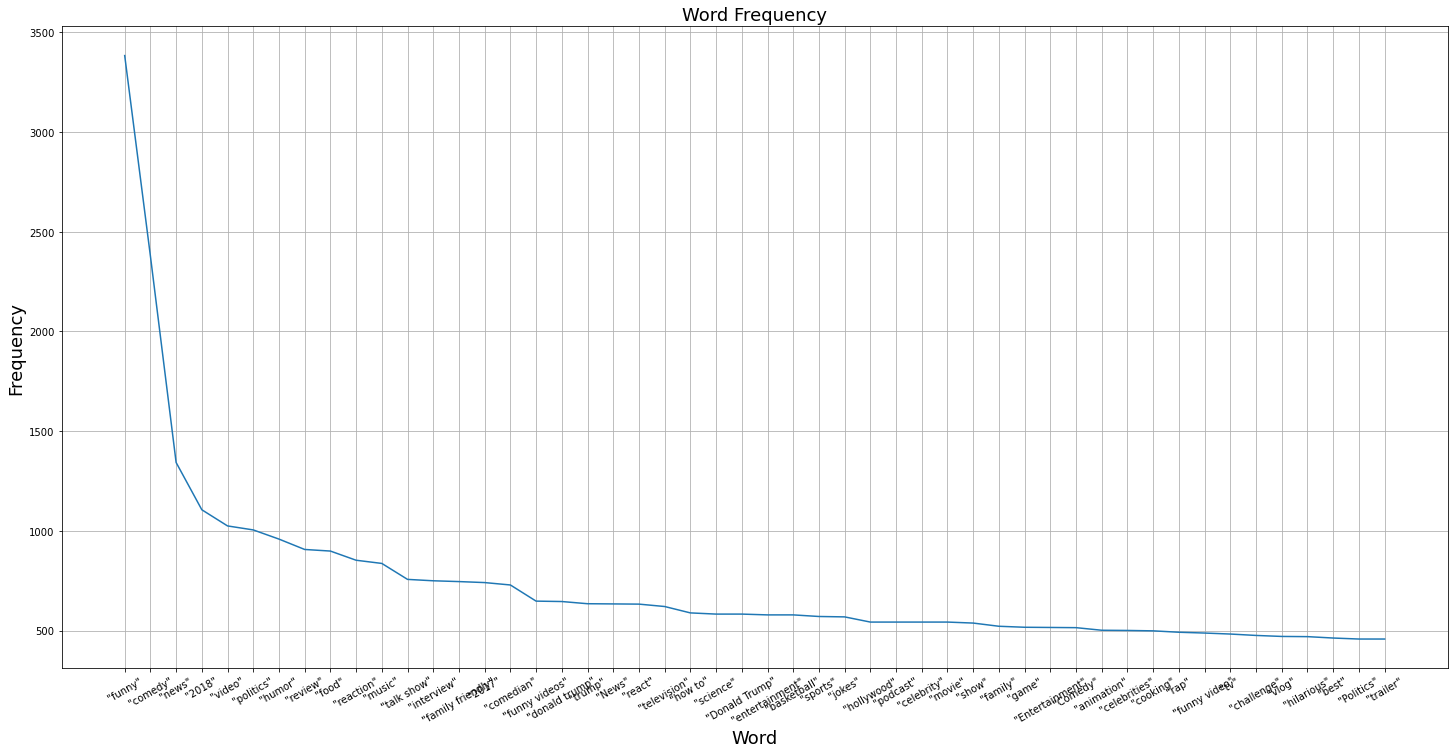

In [36]:
## Plot word frequencey graph for top 50 most occuring word
def wordFrequencyGraph():
    wordsList = []
    countList = []
    for key,val in sortedDict.items():
        wordsList.append(key)
        countList.append(val)
    fig, ax=plt.subplots(figsize=(20,10))
    ax.plot(wordsList[:50],countList[:50])
    ax.set_xticklabels(wordsList[:50],fontsize=10)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.title("Word Frequency",fontsize=18)
    plt.ylabel("Frequency",fontsize=18)
    plt.xlabel("Word",fontsize=18)
    plt.grid()
    plt.show()
wordFrequencyGraph()

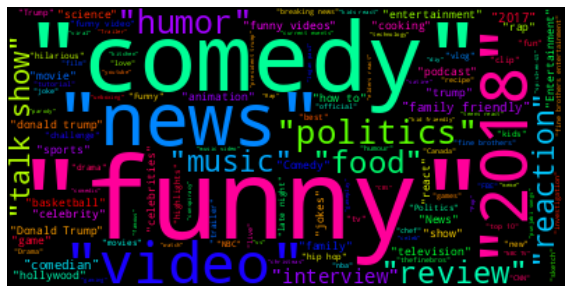

In [37]:
## Word Cloud of most frequently used Tags
def wordCloud():
    cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(sortedDict)
    plt.figure(figsize=(10,10))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
wordCloud()

## Objective 1.2 How title of video affect videos?

### Objective 1.2.1 : Do you Like long youtube title or short?? Lets see what other thinks!!

In [40]:
## Length of title and sorted in descending order
def lengthOfTitle():
    titleList = []
    for i,row in videoCompleteDF.iterrows():
        titleList.append(len(row["title"].split(" ")))
    videoCompleteDF["titleWordCount"] = titleList
    return videoCompleteDF.sort_values(by="titleWordCount", ascending=False)
sortedVideo = lengthOfTitle()

In [41]:
# Dataframe to find average and standard deviation 
sortedVideo.describe()["titleWordCount"]

count    40881.000000
mean         9.371640
std          4.226966
min          1.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         30.000000
Name: titleWordCount, dtype: float64

In [42]:
# grouping data by number of words in title to see what is average number of words in title
grouppedVidep = sortedVideo.groupby(by="titleWordCount").count()["video_id"]
grouppedVidep

titleWordCount
1      497
2      460
3     1508
4     2202
5     2976
6     3580
7     4104
8     3697
9     3688
10    3436
11    2892
12    2497
13    2070
14    1728
15    1676
16    1245
17    1019
18     695
19     386
20     232
21     153
22      68
23      49
24      11
25       8
26       1
28       2
30       1
Name: video_id, dtype: int64

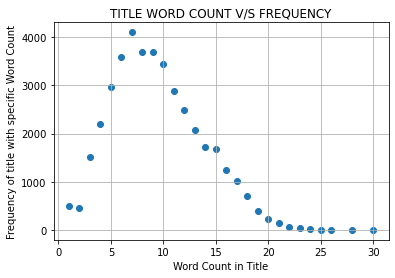

In [43]:
# Scatter plot to show distribution of word countin title to its frequency
def wordFrequency():
    plt.scatter(grouppedVidep.index,grouppedVidep)
    plt.xlabel("Word Count in Title")
    plt.ylabel("Frequency of title with specific Word Count")
    plt.title("TITLE WORD COUNT V/S FREQUENCY")
    plt.grid()
wordFrequency()

 ### Objective 1.2.2 Ever thought which of these video title would be trending Click-Bait, Question, Statement

In [46]:
# check if text has click-bait statement
# if text contains click-bait statement it return True else false
def isClickBait(text):
    clickbait_keywords = ['shocking', 'amazing', 'unbelievable', 'must see', 'you won\'t believe', 'exclusive', 'secret', 'revealed', 'hidden', 'mind-blowing', 'insane']
    CLICKBAIT_PATTERN = re.compile('|'.join(clickbait_keywords), flags=re.IGNORECASE)
    return bool(re.search(CLICKBAIT_PATTERN, text))

In [47]:
# check if text is a question or statement
# returns either "Question" OR "Statement"
def categorize_title(title):
    if re.search(r'\b(?:how|what|when|where|which|who|whom|whose|why|is|are|am|will|can|could|do|does|did|has|have|had|should|would|may|might|must|shall|will|won\'t|wouldn\'t|can\'t|couldn\'t|didn\'t|doesn\'t|haven\'t|hasn\'t|hadn\'t|shouldn\'t|isn\'t|aren\'t|amn\'t)\b', title, flags=re.IGNORECASE):
        return 'Question'
    else:
        return 'Statement'

In [48]:
#Classifying data into clickbait, statement and question!!
videoCompleteDF["clickBait"] = videoCompleteDF["title"].apply(isClickBait)
clickBaitDF=videoCompleteDF[videoCompleteDF["clickBait"]==True]
videoCompleteDF["Category_Title"] =  videoCompleteDF["title"].apply(categorize_title)
statementDF = videoCompleteDF[videoCompleteDF["Category_Title"]=="Statement"]
questionDF = videoCompleteDF[videoCompleteDF["Category_Title"]=="Question"]

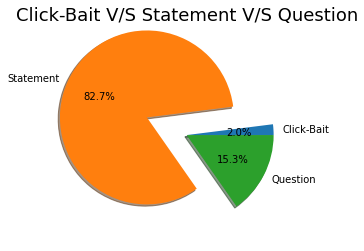

In [49]:
# pie chart representing video titles segregated into clickBait, statement, question
def titleType():
    lables=["Click-Bait","Statement","Question"]
    pieList=[clickBaitDF.shape[0],statementDF.shape[0],questionDF.shape[0]]
    explode=[0,0.5,0]
    plt.title("Click-Bait V/S Statement V/S Question",fontsize=18)
    plt.pie(pieList,labels=lables,autopct='%1.1f%%',explode=explode,shadow={'ox': -0.04, 'edgecolor': 'b', 'shade': 1})
    plt.show()
titleType()

### Objective 1.3 : Curious on what to put as description??

#### Does having links in description helps videos to trend ? If so how many? 

In [54]:
## method to check if text contain link
## if link exist, returns list of links else empty list
def hasLink(text):
    URL_PATTERN = "(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])"
    return(re.findall(URL_PATTERN,text))

In [55]:
## Check record which has link in description and how many link per video description
videoCompleteDF["description"] = videoCompleteDF["description"].apply(str)
lenLink = []
for i , row in videoCompleteDF.iterrows():
        lenLink.append(len(hasLink(row["description"])))
videoCompleteDF["lenLink"] = lenLink

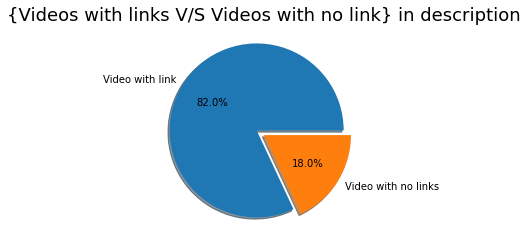

In [56]:
## Percent of videos with link in description
def pieChartDescriptionLink():
    lables=["Video with link","Video with no links"]
    explode=(0.1,0)
    plt.title("{Videos with links V/S Videos with no link} in description",fontsize=18)
    plt.pie([videoCompleteDF[videoCompleteDF["lenLink"]!=0].shape[0],videoCompleteDF[videoCompleteDF["lenLink"]==0].shape[0]],labels=lables,explode=explode,autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'b', 'shade': 1})
    plt.show()
pieChartDescriptionLink()

In [57]:
# average number of links in trending video description
videoCompleteDF["lenLink"].describe()["mean"]

7.588415156185025

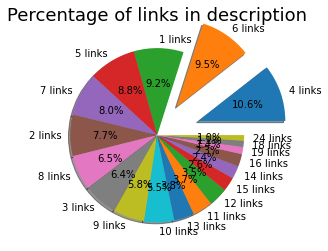

<Figure size 1440x1440 with 0 Axes>

In [58]:
## pieChart representing number of links on videos description
def pieChartDescriptionLinks():
    videoLinkLenDf = videoCompleteDF.groupby("lenLink").count()
    videoLinkLenDf = videoLinkLenDf.sort_values("video_id",ascending=False)

    explode = [0]*17
    explode.insert(0,0.5)
    explode.insert(1,0.4)

    lables = []
    for length in videoLinkLenDf.index[1:20]:
        if length == 0:
            lables.append(str(length)+" link")
        else:
            lables.append(str(length)+" links")
    plt.title("Percentage of links in description", fontsize=18)
    plt.pie(videoLinkLenDf["video_id"][1:20],labels=lables,explode=explode,radius=1,autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'b', 'shade': 1})
    plt.figure(figsize=(20,20))
    plt.show()
pieChartDescriptionLinks()

#### Ever thought if trending video is influenced on whether a Eighth grade can understand its description after single read!!

Here we used a python library called textstat, which is used to calculate statistics from text It helps determine readability, complexity, and grade level. We are focused on using gunning_fog value to calculatye readability. 
The module has limitation as it has limited language access, and as our data contain multiple language hence few values are unexpected hence we remove those values!!

In [59]:
### readability analisys
videoCompleteDF["textstat"] = videoCompleteDF["description"].apply(textstat.gunning_fog).apply(round)

In [60]:
## Describe textstat columns to check mean readiability score
videoCompleteDF["textstat"].describe()

count    40881.000000
mean        10.086740
std         11.782434
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max        480.000000
Name: textstat, dtype: float64

In [61]:
## slice datafrome to get textstat less then 20
## due to limitation of textstat library, we have few values which is over 20, 
## while gunning fog value limits at 20 hence removing those values greater than 20
videoCompleteDF= videoCompleteDF[videoCompleteDF["textstat"]<=20]
videoCompleteDF.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,category_name,numberOfTags,titleWordCount,clickBait,Category_Title,lenLink,textstat
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,6,8,False,Statement,14,7
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,STill got a lot of packages. Probably will las...,Comedy,11,6,False,Statement,9,8
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,23,10,False,Statement,19,11
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,False,False,I know it's been a while since we did this sho...,Entertainment,14,5,False,Statement,7,9
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,...,False,False,► Follow for News! - https://twitter.com/KEEMS...,News & Politics,17,16,False,Statement,12,10


In [62]:
videoCompleteDF["textstat"].describe()

count    39409.000000
mean         8.998427
std          3.802738
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         20.000000
Name: textstat, dtype: float64

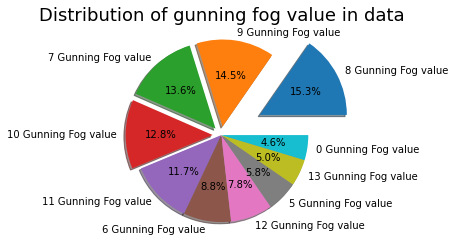

<Figure size 1152x1440 with 0 Axes>

In [63]:
## piechart representing split of gunning fog value across data
def pieChartGunningValue():
    videoTextDf = videoCompleteDF.groupby("textstat").count()
    videoTextDf = videoTextDf.sort_values("video_id",ascending=False)
    explode = [0]*6
    explode.insert(0,0.5)
    explode.insert(1,0.1)
    explode.insert(2,0.1)
    explode.insert(3,0.1)
    lables = []
    for length in videoTextDf.index[:10]:
            lables.append(str(length)+" Gunning Fog value")
    plt.title("Distribution of gunning fog value in data",fontsize=18)
    plt.pie(videoTextDf["video_id"][:10],labels=lables,explode=explode,autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'b', 'shade': 1})
    plt.figure(figsize=(16,20))
    plt.show()
pieChartGunningValue()

#### Does asking for Like, Subscribe or Share really helps in trending of videos ??? 

In [64]:
## call to action method check if Subscribe,Like,Share pattern is seen in text
## return the matching value
def callToAction(text):
    CTA_PATTERN = re.compile("(Subscribe|Like|Share|Sharing|shared|Liking|subscribing|subscribed|)",re.IGNORECASE)
    return(re.search(CTA_PATTERN,text).group())

In [65]:
#Calcualte if call to action in description influence if the video would be trending!
callToActionList = []
for i,row in videoCompleteDF.iterrows():
    match = callToAction(row["description"])
    if match:
        callToActionList.append(match)

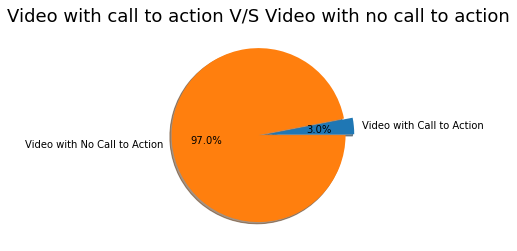

In [66]:
## Percent of videos with link in description
def piechartCallToAction():
    lables=["Video with Call to Action","Video with No Call to Action"]
    explode=(0.1,0)
    plt.title("Video with call to action V/S Video with no call to action", fontsize=18)
    plt.pie([len(callToActionList),videoCompleteDF.shape[0]],labels=lables,explode=explode,autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'b', 'shade': 1})
    plt.show()
piechartCallToAction()

#### _Brief Explanation of following code cell_

_Below is a silly example of some trivial data. Replace this markup cell and the one below with something more interesting. And go on adding more until you have 
achieved your objectives (at least to some extent)._

In [4]:
## Code Cell
## This will typically consist of:

## (a) Code doing some data manipulation:

fm_data = { "souvenir"     :  9,
            "cute animal"  :  5,
            "meme"         : 36,
            "smiley"       :  3,
            "random image" : 13
          }
total = sum([fm_data[f] for f in fm_data])

## (b) Code for displaying some output:

print("The total number of fridge magnets is:", total)

The total number of fridge magnets is: 66


#### _Comment on previous cell output (optional)_

_As well as describing code, it will in many cases be informative to describe the output
that has been generated by a cell._

_The previous output cell shows a key number in our fridge magnet analysis._

#### _Brief Explanation of following code cell_

_Since fridge magnets often take the form of cute animals, we use `pandas` to convert the raw data into a `DataFrame`._

In [5]:
## Code Cell
import pandas
df = pandas.DataFrame.from_dict(fm_data, orient='index')
df

,0
souvenir,9
cute animal,5
meme,36
smiley,3
random image,13


#### _Comment on previous cell output (optional)_
_The output from the previous cell is very interesting._

_The following cell defines a visualisation function for the data._

In [6]:
def fridge_sorted_bar(color='blue'):
    df.sort_values(0).plot.bar( color=color)   

###  _More code cells_
_You can add as many code cells as you require, but it is
recommended that you break code into relatively small chunks and
do not exceed the maximum number of lines stated above._

# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
_Give a general overview of the results (around 200 words)._

## Objective 1

### Explanation of Results

_200-400 words_

### Visualisation
_The following bar chart gives a vivid representation of the distribution
of fridge magnet types, in which the dominance of 'meme' type magnets
is dramatically illustrated._

## Objective 1 How does factor like tags, title and description effect trending of videos!!!!

## Objective 1.1 How tags affect videos?

### Objective 1.1.1 : Does having tags in video help it to trend??

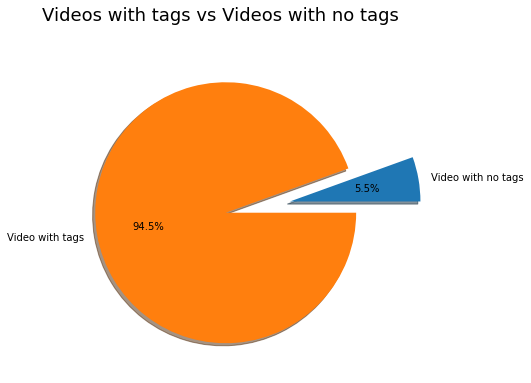

In [31]:
## pie chart representing ratio of trending videos with tags vs videos without tags
pieChartTag()

### Objective 1.1.2 : Most common tags used across trending videos!!

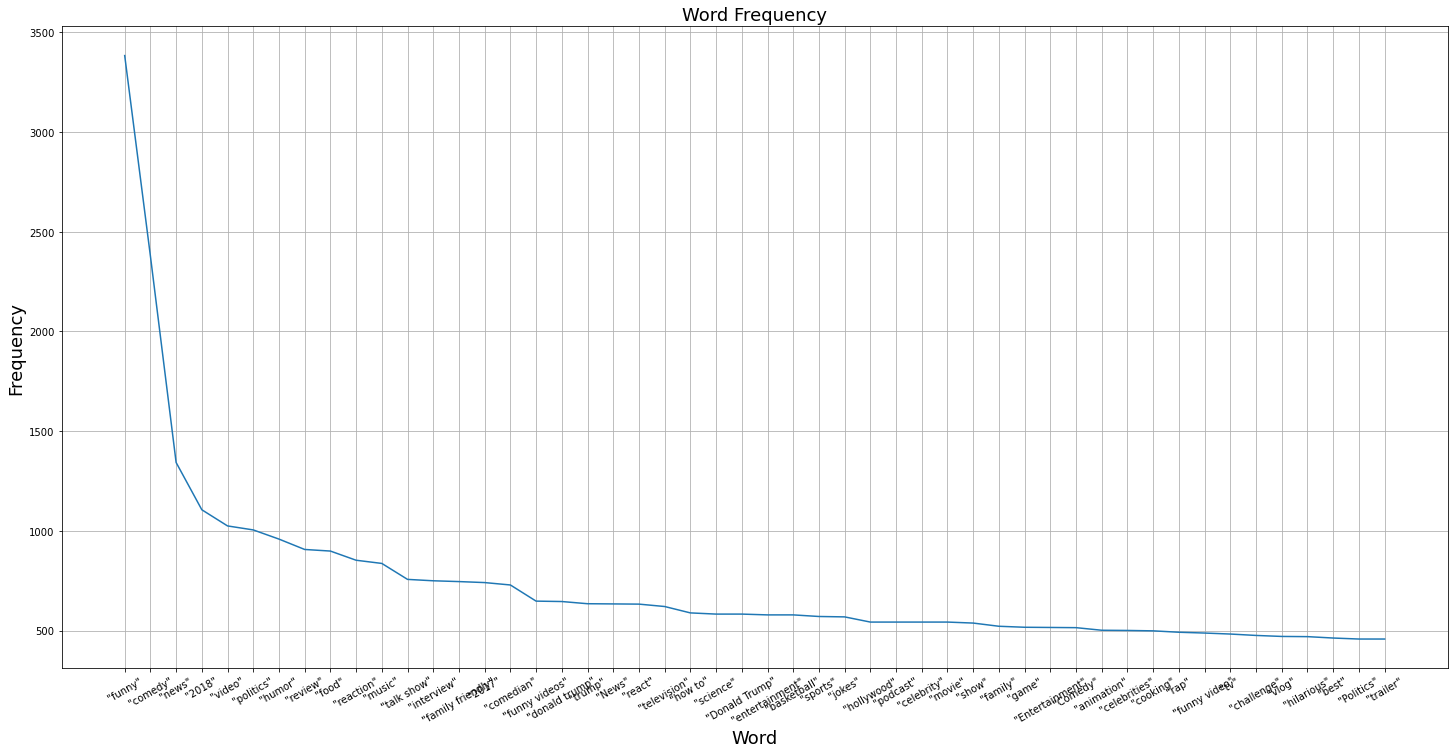

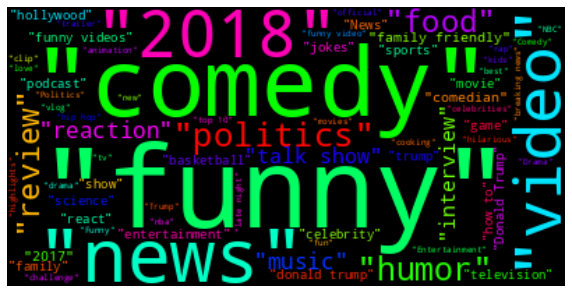

In [33]:
## Which specific tags were trending
wordFrequencyGraph()
wordCloud()

### Explanation of Objective 1.1

As per above observation we see below insights
-  We see around ***94.5%*** of trending videos have tags linked to them, hence we can conclude that tagging video helps a lot!!
-  **"funny"** seem to be dominant tag, as seen though frequency chart and word cloud. "funny" is followed by "comedy" tags, which shows the influence of humor in world of youtube videos

## Objective 1.2 How title of video affect video?

### Objective 1.2.1 : Do you Like long youtube title or short?? Lets see what other thinks!!

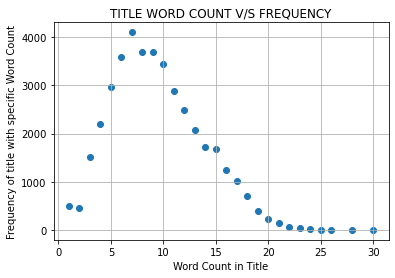

In [45]:
## Graph representing word count in title V/S frequencey of word count
wordFrequency()

From Above observation we can find on an average **6 to 9 words per title** if is good enough. then we see more words leeds to over complicated title which tends to decrease in popularity of video, we see 7 words per title has maximum number of video trending

### Objective 1.2.2 : Ever thought which of these video title would be trending Click-Bait, Question, Statement

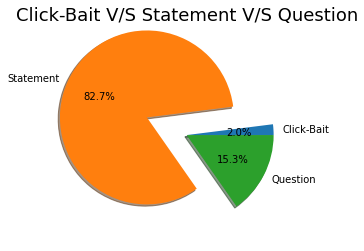

In [51]:
## pie chart represent distribution of title among category of click-bait, question, and statement
titleType()

From above pie chart represent, having a click-bait title not necessarily leads to trending videos as only 2% of the videos trends with click-bait title, We see a statement in title has highest chance to trend

### Explanation of Objective 1.2

As per above obervation we see below insight
- On an average 6 to 9 words per title is a goo length of title for a youtube video, We also see more words leed to complex title which tends to decrease popularity of videos
- We also see a **statement type of title works best around 83% of trending videos** were classified as statement, unlike what is believed click-bait vidoes do well, data says other wise.

## Objective 1.3 : Curious on what to put as description??

### Objective 1.3.1 : Does having links in description helps videos to trend ? If so how many? 

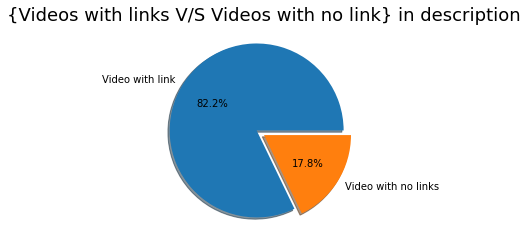

In [67]:
# pie chart representing if having links in description helps
pieChartDescriptionLink()

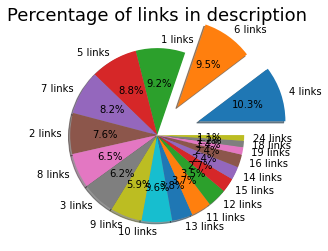

<Figure size 1440x1440 with 0 Axes>

In [69]:
# char representing percentage of links in description across videos 
pieChartDescriptionLinks()

From above two charts we can see that having a link helps video to trends, as around **83% trending videos has link in their description**. Also **4 to 6 links per video description** is very common.

### Objective 1.3.1 : Ever thought if trending video is influenced on whether a Eighth grade can understand its description after single read!!

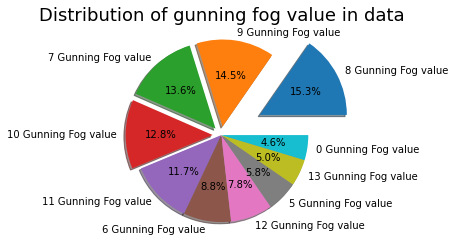

<Figure size 1152x1440 with 0 Axes>

In [71]:
# the chart represent how gunning fog valus is spread across the data 
pieChartGunningValue()

The readibility of description always plays an important role in, most of the video targets to cater eight graders to high school sophmore, the level of english is kept simple.


### Objective 1.3.1 : Does asking for Like, Subscribe or Share really helps in trending of videos ??? 

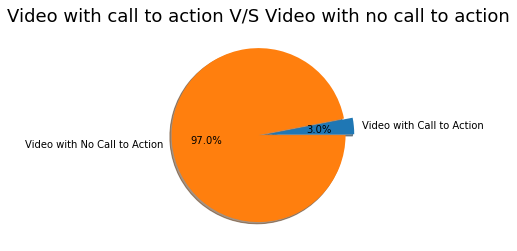

In [72]:
## graph representing call to action in video description
piechartCallToAction()

From above we can see there no direct association between the inclusion of a call to action (CTA) in descriptions and video trends. A substantial 97% of videos lack a call to action in their descriptions, indicating that the trending status of a video may be influenced by factors beyond explicit prompts for viewer engagement.

### Explanation of Objective 1.3

From our Analysis we conclude that a video description should contain 4 to 6 links with eight grade level of english and there is no direct relation between call to action and trending ov videos

### Explanation of Objective 1

In summary, the analysis of trending YouTube videos underscores the pivotal role of video tags, with approximately 94.5% of popular videos utilizing this feature. The prevalence of tags such as "funny" and "comedy" highlights humor's dominant influence on video trends.

Optimal video titles, averaging 6 to 9 words, strike a balance between conciseness and complexity, challenging the belief that longer, click-bait titles are essential. Statement-type titles, constituting around 83% of trending videos, demonstrate the effectiveness of straightforward and informative titles.

The presence of links in video descriptions is a significant factor, with about 83% of trending videos featuring them. Maintaining a balance of 4 to 6 links per video description appears common and contributes to a video's likelihood of trending.

Readability is crucial, with content targeting eighth graders to high school sophomores. Despite the prevalent absence of explicit calls to action (97% of videos lack a CTA), other factors seem more influential in determining a video's trending status.

## Objective 2
### Explanation of Results

200-400 Words

### Visualisation

## Objective 3
### Explanation of Results

200-400 Words

### Visualisation

## Objective 4 
### Explanation of Results

200-400 Words

### Visualisation

# Conclusion (5 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections._

### Achievements
_As we had expected, the most popular fridge magnets were of the 'meme' kind.
We were surprised that 'smiley' fridge magnets were less common than expected.
We conjecture that this is because, although they are apparently very popular,
few fridges display more than one smiley. However, 'meme' based magnets can
be found in large numbers, even on quite small fridges._

### Limitations

_The project was limited to a small number of fridge magents, which may not be
typical of fridges found in the global fridge magnet ecosystem._

### Future Work

_In future work we would like to obtain more diverse data and study fridge magnets 
beyond the limited confines of student accomodation. We hypothesise that there
could be a link between fridge magnet types and social class and/or educational
achievement._